# Setup

In [1]:
import json
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://epochai.org/data/epochdb/all_systems.csv'
dtypes = {
    'Training compute (FLOP)': np.float64,
}
pcd_df = pd.read_csv(data_url, dtype=dtypes)
pcd_df['Decimal year'] = pd.to_datetime(pcd_df['Publication date']).dt.year + (pd.to_datetime(pcd_df['Publication date']).dt.month - 1) / 12 + (pd.to_datetime(pcd_df['Publication date']).dt.day - 1) / 365

In [3]:
pcd_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,Citations,Base model,Finetune compute notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training compute upper bound,Archived links,Benchmark data,Decimal year
0,Fugaku-LLM,Language,"Tohoku University,CyberAgent,Tokyo Institute o...",2024-05-10,Release of “Fugaku-LLM” – a large language mod...,https://www.fujitsu.com/global/about/resources...,1.300000e+10,"""Fugaku-LLM has 13 billion parameters (2)""",2.964000e+22,https://www.wolframalpha.com/input?i=6+FLOP+*+...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.357991
1,Gemini 1.5 Flash,"Multimodal,Language,Vision,Audio",Google DeepMind,2024-05-10,Gemini 1.5: Unlocking multimodal understanding...,https://storage.googleapis.com/deepmind-media/...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.357991
2,Qwen 1.5 110B,Language,Alibaba,2024-04-25,Qwen1.5-110B: The First 100B+ Model of the Qwe...,https://qwenlm.github.io/blog/qwen1.5-110b/?re...,1.100000e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.315753
3,phi-3-medium 14B,Language,Microsoft,2024-04-23,Phi-3 Technical Report: A Highly Capable Langu...,https://arxiv.org/abs/2404.14219,1.400000e+10,14B,4.032000e+23,counting operations: 6×4.8×10^12×14×10^9 ≈ 4.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.310274
4,SenseNova 5.0,Language,SenseTime,2024-04-23,NaN,https://zhidx.com/p/421866.html,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.310274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,Sequence-based pattern recognition,Vision,Massachusetts Institute of Technology (MIT),1955-03-01,Pattern recognition and modern computers,https://dl.acm.org/doi/10.1145/1455292.1455310,NaN,NaN,NaN,NaN,...,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.166667
1304,Self Organizing System,Other,Massachusetts Institute of Technology (MIT),1955-03-01,Generalization of pattern recognition in a sel...,https://dl.acm.org/doi/10.1145/1455292.1455309,2.250000e+02,Figure 4 contains the learnt weight matrix,NaN,NaN,...,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.166667
1305,Genetic algorithm,Other,Institute for Advanced Study,1954-07-02,Numerical testing of evolution theories,https://link.springer.com/article/10.1007/BF01...,NaN,NaN,NaN,NaN,...,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954.502740
1306,SNARC,Robotics,Harvard University,1952-01-08,A Neural-Analogue Calculator Based upon a Prob...,https://en.wikipedia.org/wiki/Stochastic_neura...,4.000000e+01,The link below seems to suggest the SNARC had ...,NaN,NaN,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.019178


In [4]:
pcd_df['Publication date'] = pd.to_datetime(pcd_df['Publication date'])

In [5]:
pcd_df.sort_values('Publication date', inplace=True)

In [6]:
pcd_df.dropna(subset=['Publication date', 'Notability criteria', 'Training compute (FLOP)'], inplace=True)

In [7]:
pcd_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,Citations,Base model,Finetune compute notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training compute upper bound,Archived links,Benchmark data,Decimal year
1307,Theseus,Robotics,Bell Laboratories,1950-07-02,Mighty Mouse,https://www.technologyreview.com/2018/12/19/13...,4.000000e+01,The learned part is the maze configuration. Th...,4.000000e+01,"The ""training"" consists on the mouse running a...",...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.502740
1301,Perceptron Mark I,Other,"Cornell Aeronautical Laboratory,Cornell Univer...",1957-01-01,The Perceptron—a perceiving and recognizing au...,https://blogs.umass.edu/brain-wars/files/2016/...,1.000000e+03,"""Figure 4.8 Illustration of the Mark 1 percept...",6.948949e+05,Extracted from AI and Compute (https://openai....,...,1610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957.000000
1300,Pandemonium (morse),Language,Massachusetts Institute of Technology (MIT),1959-02-01,Pandemonium: A Paradigm for Learning,https://aitopics.org/doc/classics:504E1BAC/,NaN,The paper mentions 11 function types. Unclear ...,6.000000e+08,"The paper mentions using an IBM 704, which can...",...,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959.083333
1299,Samuel Neural Checkers,Games,IBM,1959-07-01,Some studies in machine learning using the gam...,https://ieeexplore.ieee.org/abstract/document/...,1.600000e+01,"""with 16 terms for generalization learning""\n\...",4.284000e+08,"""it can learn to do this in a remarkably short...",...,4509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959.500000
1297,Perceptron (1960),Vision,Cornell Aeronautical Laboratory,1960-03-30,Perceptron Simulation Experiments,https://www.semanticscholar.org/paper/Perceptr...,1.000000e+03,""" The first program was designed to handle\nup...",7.200000e+08,"4000 * 12000 * 15\nfrom the text ""This program...",...,394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960.246119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,"Production run is stated to have ""hundreds of ...",1.200000e+25,Speculative. The model is stated to have train...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.143607
21,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,1.000100e+25,"""Inflection-1 used approximately 4% the traini...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.183105
20,MM1-30B,"Multimodal,Language,Vision",Apple,2024-03-14,"MM1: Methods, Analysis & Insights from Multimo...",https://arxiv.org/abs/2403.09611,3.000000e+10,30B,4.860000e+23,Pre-trained on ~2B image-text pairs and 2T tok...,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.202283
13,Mixture-of-Depths,Language,"Google DeepMind,McGill University,Mila",2024-04-02,Mixture-of-Depths: Dynamically allocating comp...,https://arxiv.org/abs/2404.02258,3.000000e+09,"Figure 4: ""We used the 12.5% capacity MoD vari...",1.000000e+20,"Figure 4: ""We used the 12.5% capacity MoD vari...",...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.252740


In [8]:
outlier_window_size = 2  # years

In [9]:
start_large_scale_era = '2015-10-01'

# Top n all-time most compute-intensive (FIRST CHOICE)

In [10]:
for n in range(1, 21):
    # Add a column to mark the top n models
    pcd_df[f'top_{n}_at_release'] = False
    
    for row, model in pcd_df.iterrows():
        # Filter for models released through the model's release date
        yearly_df = pcd_df[pcd_df['Decimal year'] <= model['Decimal year']]
        # get the top n models by compute
        top_n_models = yearly_df.nlargest(n, 'Training compute (FLOP)')
        # mark these models in the original dataframe
        pcd_df.loc[top_n_models.index, f'top_{n}_at_release'] = True

In [11]:
pcd_df.columns

Index(['System', 'Domain', 'Organization', 'Publication date', 'Reference',
       'Link', 'Parameters', 'Parameters notes', 'Training compute (FLOP)',
       'Training compute notes', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes', 'Abstract',
       'Confidence', 'Model accessibility', 'Last modified', 'Created By',
       'Country (from Organization)', 'Organization categorization', 'Authors',
       'Training time notes', 'Training hardware', 'Training dataset',
       'Notability criteria', 'Notability criteria notes', 'Exclude',
       'Hardware quantity', 'Hardware utilization', 'Training time (hours)',
       'Batch size', 'Approach', 'Training compute lower bound', 'Epochs',
       'Foundation model', 'Training data center', 'Citations', 'Base model',
       'Finetune compute notes', 'Training cloud compute vendor',
       'Batch size notes', 'Finetune compute (FLOP)',
       'Training compute upper bound', 'Archived links', 'Benchm

In [12]:
np.sum(pcd_df['top_4_at_release'])

75

In [13]:
pcd_df_n = pcd_df[(pcd_df['Decimal year'] > 2015.75) & (pcd_df['Decimal year'] < 2024)].copy()

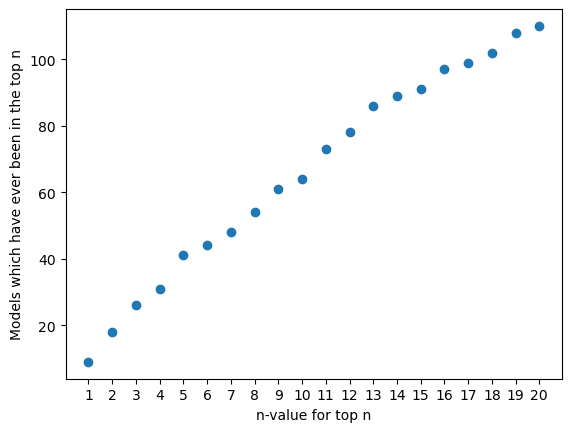

In [14]:
top_n = [np.sum(pcd_df_n[f'top_{n}_at_release']) for n in range(1, 21)]
plt.scatter(range(1, 21), top_n)
plt.xticks(ticks=range(1, 21))
plt.xlabel('n-value for top n')
plt.ylabel('Models which have ever been in the top n')
plt.show()

In [15]:
top_n_models = {}
for n in range(1, 21):
    models = pcd_df_n[pcd_df_n[f'top_{n}_at_release']]['System'].values.tolist()
    top_n_models[n] = set(models)

for n in range(20, 1, -1):
    top_n_models[n] = list(top_n_models[n].difference(top_n_models[n-1]))
top_n_models[1] = list(top_n_models[1])

In [16]:
with open('data/frontier_systems_by_top_n.json', 'w') as f:
    json.dump(top_n_models, f, indent=4)

# Default large scale systems

https://colab.research.google.com/drive/1PLGY5ErysqQMfy7Z08uIR2cTnnDgSaVR?usp=sharing

In [17]:
high_outliers_z_value_threshold = 0.76

In [18]:
large_scale_idx = set()

for index, row in pcd_df.iterrows():
  # Filter entries in a 2-year window around the paper
  window_size = pd.Timedelta(f'{outlier_window_size*52*7} days')
  half_window_size = window_size / 2
  mask = ( row['Publication date'] - half_window_size <= pcd_df['Publication date'] ) &\
        ( pcd_df['Publication date'] <= row['Publication date'] + half_window_size )
  window_df = pcd_df[mask].copy()

  if len(window_df) < 2: continue

  window_df['Training compute (FLOP) z scores'] = stats.zscore(np.log10(window_df['Training compute (FLOP)'].values))
  if window_df.loc[index, 'Training compute (FLOP) z scores'] > high_outliers_z_value_threshold:
    large_scale_idx.add(index)

large_scale_mask = pcd_df.index.isin(large_scale_idx) & (pcd_df['Publication date'] > start_large_scale_era)

In [19]:
large_scale_df = pcd_df[large_scale_mask]

In [20]:
large_scale_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,top_11_at_release,top_12_at_release,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release
1019,AlphaGo Lee,Games,DeepMind,2016-01-27,Mastering the game of Go with deep neural netw...,https://www.nature.com/articles/nature16961,NaN,NaN,1.900000e+21,This number is pretty uncertain. I expect it t...,...,True,True,True,True,True,True,True,True,True,True
980,GNMT,Language,Google,2016-09-26,Google's Neural Machine Translation System: Br...,https://arxiv.org/abs/1609.08144,2.780000e+08,Table 5 in 'Outrageously Large Neural Networks...,6.900000e+21,sqrt(10 * 100) factor added because production...,...,True,True,True,True,True,True,True,True,True,True
979,Xception,Vision,Google,2016-10-07,Xception: Deep Learning with Depthwise Separab...,https://arxiv.org/abs/1610.02357,2.285595e+07,Table 3,4.360000e+20,60 K80 GPUs * 30 days * 8.5 TFLOPS/GPU * 0.33 ...,...,True,True,True,True,True,True,True,True,True,True
973,NASv3 (CIFAR-10),Vision,Google Brain,2016-11-05,Neural Architecture Search with Reinforcement ...,https://arxiv.org/abs/1611.01578,3.740000e+07,Table 1,2.200000e+21,"50 epochs * 50,000 images * 10.0 GFLOPSs * 128...",...,True,True,True,True,True,True,True,True,True,True
957,Libratus,Games,Carnegie Mellon University (CMU),2017-01-01,Libratus: The Superhuman AI for No-Limit Poker,https://www.cs.cmu.edu/~noamb/papers/17-IJCAI-...,NaN,NaN,5.510000e+20,"""In total, Libratus used about 25 million core...",...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Qwen-72B,Language,Alibaba,2023-11-30,NaN,https://huggingface.co/Qwen/Qwen-72B,7.200000e+10,72B,1.300000e+24,"72 billion params, 3 trillion tokens\n72b * 3T...",...,False,True,True,True,True,True,True,True,True,True
74,Gemini 1.0 Ultra,"Multimodal,Language,Vision",Google DeepMind,2023-12-06,Gemini: A Family of Highly Capable Multimodal ...,https://storage.googleapis.com/deepmind-media/...,NaN,NaN,5.000000e+25,This number is an estimate based on limited ev...,...,True,True,True,True,True,True,True,True,True,True
30,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,"Production run is stated to have ""hundreds of ...",1.200000e+25,Speculative. The model is stated to have train...,...,True,True,True,True,True,True,True,True,True,True
21,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,1.000100e+25,"""Inflection-1 used approximately 4% the traini...",...,True,True,True,True,True,True,True,True,True,True


In [21]:
for system in large_scale_df['System'][::-1]:
  print(system)

Llama 3-70B
Inflection-2.5
MegaScale (Production)
Gemini 1.0 Ultra
Qwen-72B
Inflection-2
Grok-1
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
PaLM 2
GPT-4
LLaMA-65B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Flan-PaLM 540B
U-PaLM (540B)
BlenderBot 3
GLM-130B
Minerva (540B)
Parti
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
GOAT
ByT5-XXL
ProtT5-XXL
Meta Pseudo Labels
Switch
DALL-E
mT5-XXL
GShard (dense)
iGPT-XL
GPT-3 175B (davinci)
Turing-NLG
Meena
ContextNet + Noisy Student
OpenAI Five Rerun
OpenAI Five
AlphaStar
T5-11B
Megatron-LM (8.3B)
Megatron-BERT
RoBERTa Large
XLNet
MnasNet-A3
MnasNet-A1 + SSDLite
GPT-2 (1.5B)
Transformer (Adaptive Input Embeddings)
BigGAN-deep 512x512
FTW
ResNeXt-101 32x48d
AmoebaNet-A (F=448)
AlphaZero
AlphaGo Zero
OpenAI TI7 DOTA 1v1
JFT
AlphaGo Master
Libratus
NASv3 (CIFAR-10)
Xception
GNMT
AlphaGo Lee


# Percentiles (SECOND CHOICE)

In [22]:
frontier_systems_by_percentile = {}
percentile_interval = 5
for percentile in range(95, -5, -percentile_interval):
  print(percentile)
  percentile_compute_low = np.zeros(len(pcd_df))
  percentile_compute_high = np.zeros(len(pcd_df))
  # Iterate through each row and calculate the 2-year moving average for each date
  for i, (index, row) in enumerate(pcd_df.iterrows()):
    # Define the 2-year window
    start_date = row['Publication date'] - pd.DateOffset(years=outlier_window_size/2)
    end_date = row['Publication date'] + pd.DateOffset(years=outlier_window_size/2)

    # Filter the DataFrame for this window
    window_df = pcd_df[(pcd_df['Publication date'] >= start_date) & (pcd_df['Publication date'] <= end_date)]

    percentile_compute_low[i] = np.percentile(window_df['Training compute (FLOP)'], percentile)
    percentile_compute_high[i] = np.percentile(window_df['Training compute (FLOP)'], percentile + percentile_interval)

  frontier_systems_flag = pcd_df['Training compute (FLOP)'] > np.array(percentile_compute_low)
  extra_frontier_systems_flag = pcd_df['Training compute (FLOP)'] <= np.array(percentile_compute_high)

  # raise Exception("Edit the following line if you want to consider models released after 2023-12-31.")
  extra_frontier_systems = pcd_df['System'][frontier_systems_flag & extra_frontier_systems_flag & (pcd_df['Publication date'] > pd.to_datetime('2015-09-30')) & (pcd_df['Publication date'] < pd.to_datetime('2024-01-01'))].values

  frontier_systems_by_percentile[percentile] = list(extra_frontier_systems)

95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


In [23]:
frontier_systems_by_percentile

{95: ['GNMT',
  'AlphaGo Master',
  'AlphaGo Zero',
  'AlphaZero',
  'ResNeXt-101 32x48d',
  'FTW',
  'Megatron-BERT',
  'OpenAI Five',
  'Meena',
  'GPT-3 175B (davinci)',
  'Megatron-Turing NLG 530B',
  'PaLM (540B)',
  'Minerva (540B)',
  'GPT-4',
  'Gemini 1.0 Ultra'],
 90: ['NASv3 (CIFAR-10)',
  'T5-11B',
  'AlphaStar',
  'mT5-XXL',
  'Switch',
  'Gopher (280B)',
  'ERNIE 3.0 Titan',
  'Chinchilla',
  'U-PaLM (540B)',
  'Flan-PaLM 540B',
  'GPT-3.5 (text-davinci-003)',
  'PaLM 2',
  'Claude 2',
  'Inflection-2'],
 85: ['AlphaGo Fan',
  'AlphaGo Lee',
  'JFT',
  'Megatron-LM (8.3B)',
  'OpenAI Five Rerun',
  'Turing-NLG',
  'Yuan 1.0',
  'GLaM',
  'LaMDA',
  'OPT-175B',
  'BLOOM-176B',
  'Falcon-180B',
  'Grok-1'],
 80: ['OpenAI TI7 DOTA 1v1',
  'AmoebaNet-A (F=448)',
  'BigGAN-deep 512x512',
  'GPT-2 (1.5B)',
  'XLNet',
  'iGPT-XL',
  'DALL-E',
  'Meta Pseudo Labels',
  'ProtT5-XXL',
  'ByT5-XXL',
  'GOAT',
  'AlphaCode',
  'ST-MoE',
  'Flamingo',
  'Parti',
  'BlenderBot 3',
  'L

In [24]:
# Save to JSON
with open('data/frontier_systems_by_window_percentile.json', 'w') as f:
    json.dump(frontier_systems_by_percentile, f, indent=4)

In [25]:
total_num_systems = 0
for percentile, systems in frontier_systems_by_percentile.items():
  total_num_systems += len(systems)
  print(percentile, 'to', percentile + percentile_interval)
  print(len(systems), "systems")
  print(f'Total systems above {percentile}th percentile: {total_num_systems}')
  for system in systems[::-1]:
    print(system)
  print()

95 to 100
15 systems
Total systems above 95th percentile: 15
Gemini 1.0 Ultra
GPT-4
Minerva (540B)
PaLM (540B)
Megatron-Turing NLG 530B
GPT-3 175B (davinci)
Meena
OpenAI Five
Megatron-BERT
FTW
ResNeXt-101 32x48d
AlphaZero
AlphaGo Zero
AlphaGo Master
GNMT

90 to 95
14 systems
Total systems above 90th percentile: 29
Inflection-2
Claude 2
PaLM 2
GPT-3.5 (text-davinci-003)
Flan-PaLM 540B
U-PaLM (540B)
Chinchilla
ERNIE 3.0 Titan
Gopher (280B)
Switch
mT5-XXL
AlphaStar
T5-11B
NASv3 (CIFAR-10)

85 to 90
13 systems
Total systems above 85th percentile: 42
Grok-1
Falcon-180B
BLOOM-176B
OPT-175B
LaMDA
GLaM
Yuan 1.0
Turing-NLG
OpenAI Five Rerun
Megatron-LM (8.3B)
JFT
AlphaGo Lee
AlphaGo Fan

80 to 85
19 systems
Total systems above 80th percentile: 61
Qwen-72B
ChatGLM3
Llama 2-70B
BlenderBot 3
Parti
Flamingo
ST-MoE
AlphaCode
GOAT
ByT5-XXL
ProtT5-XXL
Meta Pseudo Labels
DALL-E
iGPT-XL
XLNet
GPT-2 (1.5B)
BigGAN-deep 512x512
AmoebaNet-A (F=448)
OpenAI TI7 DOTA 1v1

75 to 80
14 systems
Total systems abov

# Distance from compute record at the time

In [26]:
ooms_from_frontier = 2

In [27]:
current_max = 0
running_max = np.zeros(len(pcd_df))
for i, compute in enumerate(pcd_df['Training compute (FLOP)']):
  if compute > current_max:
    running_max[i] = compute
    current_max = compute
  else:
    running_max[i] = current_max
running_max

array([4.00000000e+01, 6.94894938e+05, 6.00000000e+08, 6.00000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 2.83280026e+10, 2.83280026e+10, 2.83280026e+10,
       1.81440000e+11, 1.81440000e+11, 1.81440000e+11, 1.81440000e+11,
       1.81440000e+11, 1.81440000e+11, 1.82321576e+13, 1.82321576e+13,
       1.82321576e+13, 1.82321576e+13, 2.10080000e+13, 2.10080000e+13,
       6.30000000e+13, 1.30389876e+15, 1.30389876e+15, 1.30389876e+15,
       1.30389876e+15, 1.30389876e+15, 3.41463600e+15, 6.14400000e+16,
       6.14400000e+16, 2.73196800e+17, 2.73196800e+17, 2.73196800e+17,
       6.00000000e+17, 6.00000000e+17, 6.00000000e+17, 6.00000000e+17,
       6.00000000e+17, 6.00000000e+17, 6.00000000e+17, 1.34092800e+18,
       1.34092800e+18, 1.34092800e+18, 1.34092800e+18, 1.34092800e+18,
       3.41107200e+18, 3.41107200e+18, 3.41107200e+18, 9.25344000e+18,
      

In [28]:
pcd_df['Frontier training compute (FLOP)'] = running_max

In [29]:
pcd_df['Frontier system'] = (pcd_df['Publication date'] > start_large_scale_era) & (np.log10(pcd_df['Frontier training compute (FLOP)']) - np.log10(pcd_df['Training compute (FLOP)']) <= ooms_from_frontier)
pcd_df[['System', 'Frontier system']]

,System,Frontier system
1307,Theseus,False
1301,Perceptron Mark I,False
1300,Pandemonium (morse),False
1299,Samuel Neural Checkers,False
1297,Perceptron (1960),False
...,...,...
30,MegaScale (Production),True
21,Inflection-2.5,True
20,MM1-30B,False
13,Mixture-of-Depths,False


In [30]:
frontier_df = pcd_df[pcd_df['Frontier system']]
frontier_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release,Frontier training compute (FLOP),Frontier system
1025,DeepSpeech2 (English),Speech,Baidu Research - Silicon Valley AI Lab,2015-12-08,Deep Speech 2: End-to-End Speech Recognition i...,https://arxiv.org/abs/1512.02595,3.800000e+07,All networks have 38 million parameters.,2.600000e+19,1 timestep = (1280 hidden units)^2 * (7 RNN la...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
1023,ResNet-152 (ImageNet),Vision,Microsoft,2015-12-10,Deep Residual Learning for Image Recognition,https://arxiv.org/abs/1512.03385,6.000000e+07,Taken from https://arxiv.org/abs/1605.07146,1.210000e+19,(11.4 *10^9) mult-adds per forward pass\n2 FLO...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
1019,AlphaGo Lee,Games,DeepMind,2016-01-27,Mastering the game of Go with deep neural netw...,https://www.nature.com/articles/nature16961,NaN,NaN,1.900000e+21,This number is pretty uncertain. I expect it t...,...,True,True,True,True,True,True,True,True,1.900000e+21,True
980,GNMT,Language,Google,2016-09-26,Google's Neural Machine Translation System: Br...,https://arxiv.org/abs/1609.08144,2.780000e+08,Table 5 in 'Outrageously Large Neural Networks...,6.900000e+21,sqrt(10 * 100) factor added because production...,...,True,True,True,True,True,True,True,True,6.900000e+21,True
979,Xception,Vision,Google,2016-10-07,Xception: Deep Learning with Depthwise Separab...,https://arxiv.org/abs/1610.02357,2.285595e+07,Table 3,4.360000e+20,60 K80 GPUs * 30 days * 8.5 TFLOPS/GPU * 0.33 ...,...,True,True,True,True,True,True,True,True,6.900000e+21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Qwen-72B,Language,Alibaba,2023-11-30,NaN,https://huggingface.co/Qwen/Qwen-72B,7.200000e+10,72B,1.300000e+24,"72 billion params, 3 trillion tokens\n72b * 3T...",...,True,True,True,True,True,True,True,True,2.100000e+25,True
74,Gemini 1.0 Ultra,"Multimodal,Language,Vision",Google DeepMind,2023-12-06,Gemini: A Family of Highly Capable Multimodal ...,https://storage.googleapis.com/deepmind-media/...,NaN,NaN,5.000000e+25,This number is an estimate based on limited ev...,...,True,True,True,True,True,True,True,True,5.000000e+25,True
30,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,"Production run is stated to have ""hundreds of ...",1.200000e+25,Speculative. The model is stated to have train...,...,True,True,True,True,True,True,True,True,5.000000e+25,True
21,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,1.000100e+25,"""Inflection-1 used approximately 4% the traini...",...,True,True,True,True,True,True,True,True,5.000000e+25,True


In [31]:
for system in frontier_df['System'][::-1]:
  print(system)

Llama 3-70B
Inflection-2.5
MegaScale (Production)
Gemini 1.0 Ultra
Qwen-72B
Inflection-2
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-65B
LLaMA-7B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Taiyi-Stable Diffusion
Flan-T5 11B
Flan-PaLM 540B
U-PaLM (540B)
Whisper
PaLI
BlenderBot 3
GLM-130B
AlexaTM 20B
ESM2-15B
Minerva (540B)
Parti
CoCa
UL2
OPT-175B
Flamingo
Stable Diffusion (LDM-KL-8-G)
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
GPT-NeoX-20B
RETRO-7B
AlphaCode
ERNIE 3.0 Titan
XGLM-7.5B
XGLM
GLaM
Gopher (280B)
Student of Games
Florence
BASIC-L
Yuan 1.0
Megatron-Turing NLG 530B
AlphaFold-Multimer
FLAN 137B
SEER
GOAT
HuBERT
ERNIE 3.0
ALIGN
DeBERTa
CoAtNet
ByT5-XXL
CogView
ProtT5-XXL-BFD
ProtBERT-BFD
ProtT5-XXL
PLUG
M6-T
Meta Pseudo Labels
MSA Transformer
Switch
DALL-E
CLIP (ViT L/14@336px)
ViT-Huge/14
mT5-XXL
Conformer + Wav2vec 2.0 + Noisy Student
GShard (dense)
iGPT-XL
iGPT-L
GPT-3 175B (davin

# Constant threshold

In [32]:
compute_threshold = 1e23

In [33]:
above_threshold = pcd_df[pcd_df['Training compute (FLOP)'] > compute_threshold]

In [34]:
print(len(above_threshold), 'systems')
for system in above_threshold['System'][::-1]:
  print(system)

53 systems
Llama 3-70B
MM1-30B
Inflection-2.5
MegaScale (Production)
FunSearch
Gemini 1.0 Ultra
Qwen-72B
Inflection-2
Nemotron-3-8B
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
FinGPT-13B
Falcon-180B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
WizardCoder-15.5B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-65B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Flan-PaLM 540B
U-PaLM (540B)
BlenderBot 3
GLM-130B
AlexaTM 20B
Minerva (540B)
Parti
UL2
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
GPT-3 175B (davinci)
Meena
AlphaGo Zero
AlphaGo Master
